# Hotel Review Classifier

*Flatiron School Data Science Bootcamp*

Captsone Project - Sentiment/Ratings Analysis

Anna D'Angela | [annaadangela@gmail.com](mailo:annaadangela@gmail.com)

[Return to GitHub repo](https://github.com/anna-dang/mod05-capstone)


# Data Collection Notebook

In this notebook I will gather data for my capstone classification project by scraping the internet for travel reviews. The custom scraping functions I built are located here: [/capstone_functions/collection_functions.py](./capstone_functions/collection_functions.py). For my full analysis, please see [NLP_and_modeling.ipynb](./NLP_and_modeling.ipynb) notebook.

#### Contents:
1. Sourcing Strategy
2. Web Scrape
3. Concatenate Scrapes
4. Export Final Data

In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from re import compile, split
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep, time

# Custom functions
from capstone_functions import collection_functions as cf

In [2]:
# Auto - reload custom function library
%load_ext autoreload
%autoreload 2

## 1. Sourcing Strategy

### 1.1 Objective
To build a corpus of hotel related text with tagged sentiment, I will scrape a travel website for user reviews and ratings. I selected Trip Advisor due to the volume of public facing reviews available and the notable detail/length of an average review. Trip Advisor reviews are paired with the user's rating. Ratings are scored as whole numbers from 1 (worst) to 5 (best).

I will scrape between 500 and 2000 reviews from each of 24 hotels in the Denver, Colorado metro area. I set the amount scraped mannually after confirming the number of reviews per property. 

Since I am not doing an analysis of the Denver hotel industry and wish to train a supervied model - my priority was scraping as diverse a range of score possible.I scraped low to mid-range hotels with a standard nightly rate under $250/night (at time of scrape, January 2021).

### 1.2 Limitations

The scoring metric is entirely up to the user. Therefor, one person's 3 could be another person's 5. If there reviews use mostly the same vocab this could introduce extra noise to the model.

## 2. Web Scrape

### 2.1 Prepare to Scrape

In [8]:
# Import hotel homepage extensions as a list 
with open("./data/denver_urls.txt", "r") as scrape_1_urls:
    hotel_homepage_urls = scrape_1_urls.read().splitlines()

# Remove white space caused by 'splitlines'
hotel_homepage_urls = [i for i in hotel_homepage_urls if i]

# Preview
print("Number of hotels to scrape:", len(hotel_homepage_urls))
hotel_homepage_urls[:10]

Number of hotels to scrape: 24


['/Hotel_Review-g33388-d85364-Reviews-Best_Western_Plus_Denver_International_Airport_Inn_Suites-Denver_Colorado.html',
 '/Hotel_Review-g33388-d81026-Reviews-Clarion_Hotel_Denver_Central-Denver_Colorado.html',
 '/Hotel_Review-g33388-d85368-Reviews-La_Quinta_Inn_Suites_by_Wyndham_Denver_Airport_Dia-Denver_Colorado.html',
 '/Hotel_Review-g33388-d6577001-Reviews-The_Crawford_Hotel-Denver_Colorado.html',
 '/Hotel_Review-g33388-d83046-Reviews-Grand_Hyatt_Denver_Downtown-Denver_Colorado.html',
 '/Hotel_Review-g33388-d83097-Reviews-Warwick_Denver_Hotel-Denver_Colorado.html',
 '/Hotel_Review-g33388-d8263810-Reviews-The_Westin_Denver_International_Airport-Denver_Colorado.html',
 '/Hotel_Review-g33388-d114326-Reviews-Hyatt_Place_Denver_Cherry_Creek-Denver_Colorado.html',
 '/Hotel_Review-g33388-d225090-Reviews-Microtel_Inn_Suites_by_Wyndham_Denver-Denver_Colorado.html',
 '/Hotel_Review-g33388-d83057-Reviews-Hilton_Denver_City_Center-Denver_Colorado.html']

In [107]:
# Create a base df to populate with hotel information
base_df = pd.DataFrame(columns = ['Location', 'Hotel', 'Title', 'Review', 'Rating']) 
base_df

,Location,Hotel,Title,Review,Rating


### 2.2 Scrape URLs

In [ ]:
# Iterate through each hotel in list, record runtimes
start_time = time()

for i, hotel_url in enumerate([hotel_homepage_urls[4]]):
    
    print("--- Hotel ", i+1, " ---")
    
    start_run = time()
    
    # Scrape each hotel for specified number of pages
    hotel_df = cf.scrape_hotel(hotel_url, n=50)
    
    # Add to base df
    base_df = pd.concat([base_df, hotel_df])
    
    # Calculate runtime
    run_time = round((time() - start_run)/60, 2)
    
    print(f"--- Run {i+1} complete:", run_time, "minutes ---")
    
    # Avoid being booted
    sleep(3)

# Total run time
full_run_time = time() - start_time

In [117]:
# Total scrape runtime
print(round(full_run_time/60, 2), "minutes")

18.87 minutes


### 2.3 Check Data from Scrape

In [12]:
# Rename to hold a backup (so don't accidentally save over)
df = base_df

# Check full populated df
df.head()

,Location,Hotel,Title,Review,Rating
0,"Denver, CO",The Crawford Hotel,WHAT A STAY!,The Crawford Hotel was seriously the most uniq...,5
1,"Denver, CO",The Crawford Hotel,Anniversary Staycation,Husband and I booked the B&B package for our 3...,4
2,"Denver, CO",The Crawford Hotel,Birthday Getaway,"We traveled from Emeryville, CA to Denver on t...",5
3,"Denver, CO",The Crawford Hotel,A perfect staycation during the pandemic (and ...,We stayed at The Crawford the weekend before T...,5
4,"Denver, CO",The Crawford Hotel,Incredible service - above and beyond!,Thoroughly enjoyed my stay at The Crawford! We...,5


In [13]:
df.shape

(1200, 5)

In [14]:
# Preview review composition (ensure that they have been fully expanded)
for r in df['Review'][0:5]:
    print(r, "\n")

The Crawford Hotel was seriously the most unique and beautiful hotels I have ever stayed in. My husband and I decided to stay here for our honeymoon and it certainly did not disappoint. From guest services answering our every need and the Tesla valet courtesy car service especially with Jamel and Riley as our drivers was amazing!!!! I can’t really say anything bad about this hotel whatsoever. Super quiet, super cozy, and outstandingly beautiful and romantic! 

Husband and I booked the B&B package for our 31st anniversary.  The hotel staff were warm, friendly, and professional.  Also I was able to update my reservation after a date mixup.  As mentioned by others in several reviews the hotel amenities are great and the rooms are beautifully decorated.  The experience overall was great with the exception of a few things:  1.  Being awaken early AM to loud noises which sounded like large doors being closed and metal clanging2.  Couldn’t figure out how to order breakfast from Snooze as it w

In [15]:
# Check df
print("Reviews:", df.shape[0])
print("Missing values?", df.isna().sum().sum())
print("Hotels:", df['Hotel'].nunique())
list(df['Hotel'].unique())

Reviews: 1200
Missing values? 0
Hotels: 1


['The Crawford Hotel']

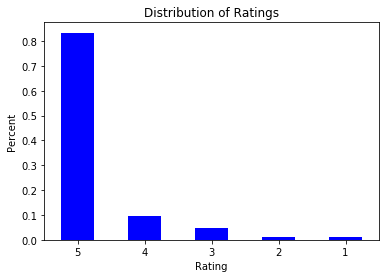

In [20]:
# Examine rating distribution
df['Rating'].value_counts(normalize=True).plot(kind='bar', rot = 0, color= 'blue');
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel("Percent")
plt.show()

### 2. 4 Save Scrape Data

In [128]:
# Save
#df.to_csv("./data/test_scrape_3.csv", index=False)

In [129]:
# Check load
check_df = pd.read_csv("./data/test_scrape_3.csv")
check_df.head()

,Location,Hotel,Title,Review,Rating
0,"Denver, CO",The Crawford Hotel,WHAT A STAY!,The Crawford Hotel was seriously the most uniq...,5
1,"Denver, CO",The Crawford Hotel,Anniversary Staycation,Husband and I booked the B&B package for our 3...,4
2,"Denver, CO",The Crawford Hotel,Birthday Getaway,"We traveled from Emeryville, CA to Denver on t...",5
3,"Denver, CO",The Crawford Hotel,A perfect staycation during the pandemic (and ...,We stayed at The Crawford the weekend before T...,5
4,"Denver, CO",The Crawford Hotel,Incredible service - above and beyond!,Thoroughly enjoyed my stay at The Crawford! We...,5


In [130]:
# Looks good!
check_df.shape

(1200, 5)

## 3. Concatenate Many Scrapes

### 3.1 Data/Scrape Descriptions

- scrape_3 : 1200 from URL 4,
        
        'The Crawford Hotel'
        
- scrape_4 : 2000 from URL 5 - 6, 
    
         'Baymont by Wyndham Denver International Airport',
         'Grand Hyatt Denver Downtown'
         
- scrape_5: 3995 reviews from URL 7 - 10, 

         'Warwick Denver Hotel',
         'The Westin Denver International Airport',
         'Hyatt Place Denver/Cherry Creek',
         'Microtel Inn & Suites by Wyndham Denver'

- scrape_6: 3930 reviews from URL 1-4, (so there may be duplicates!)
    
         'Best Western Plus Denver International Airport Inn & Suites',
         'Clarion Hotel Denver Central',
         'La Quinta Inn & Suites by Wyndham Denver Airport Dia',
         'The Crawford Hotel'
         
- scrape_8: 3000 from url 11 - 13,

        'Hilton Denver City Center'
        'Embassy Suites by Hilton Denver International Airport',
        'The Oxford Hotel'

- scrape_9: 9995 from URL 14 - 18,

        'Hyatt Regency Denver At Colorado Convention Center',
        'Baymont by Wyndham Denver International Airport',
        'The Curtis Denver - a DoubleTree by Hilton Hotel',
        'Sheraton Denver Downtown Hotel',
        'DoubleTree by Hilton Hotel Denver'
        
- scrape_10: 1196 from URL 18-25
        
        'Quality Inn & Suites Denver International Airport',
         'Comfort Inn & Suites',
         'La Quinta Inn by Wyndham Denver Central',
         '11th Avenue Hostel',
         'Hampton Inn & Suites Denver Downtown',
         'Sheraton Denver Downtown Hotel',
         'Aloft Denver Downtown',
         'Kimpton Hotel Monaco Denver'
    

### 3.2 Merge Selected Scrapes

In [4]:
# Load all 
df_3 = pd.read_csv("./data/scrape_3.csv")
df_4 = pd.read_csv("./data/scrape_4.csv")
df_5 = pd.read_csv("./data/scrape_5.csv")
df_6 = pd.read_csv("./data/scrape_6.csv")
df_8 = pd.read_csv("./data/scrape_8.csv")
df_9 = pd.read_csv("./data/scrape_9.csv")
df_10 = pd.read_csv("./data/scrape_10.csv")

In [6]:
# Check sizes
frames = [df_9, df_8, df_6, df_5, df_4, df_3, df_10]

for i in frames:
    print(i.shape[0])

9995
3000
3930
3995
2000
1200
1196


In [7]:
# Merge
full_df = pd.concat(frames)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 0 to 1195
Data columns (total 5 columns):
Location    25316 non-null object
Hotel       25316 non-null object
Title       25315 non-null object
Review      25316 non-null object
Rating      25316 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


### 3.3 Check Merge and Clean

In [8]:
# Ensure all hotels represented (24)
print(full_df['Hotel'].nunique())
full_df['Hotel'].unique()

24


array(['Hyatt Regency Denver At Colorado Convention Center',
       'Baymont by Wyndham Denver International Airport',
       'The Curtis Denver - a DoubleTree by Hilton Hotel',
       'Sheraton Denver Downtown Hotel',
       'DoubleTree by Hilton Hotel Denver',
       'Embassy Suites by Hilton Denver International Airport',
       'The Oxford Hotel', 'Hilton Denver City Center',
       'Best Western Plus Denver International Airport Inn & Suites',
       'Clarion Hotel Denver Central',
       'La Quinta Inn & Suites by Wyndham Denver Airport Dia',
       'The Crawford Hotel', 'Warwick Denver Hotel',
       'The Westin Denver International Airport',
       'Hyatt Place Denver/Cherry Creek',
       'Microtel Inn & Suites by Wyndham Denver',
       'Grand Hyatt Denver Downtown',
       'Quality Inn & Suites Denver International Airport',
       'Comfort Inn & Suites', 'La Quinta Inn by Wyndham Denver Central',
       '11th Avenue Hostel', 'Hampton Inn & Suites Denver Downtown',
       'A

In [9]:
# Check for duplicates
print("Duplicates:", full_df.duplicated().sum())
clean_df = full_df.drop_duplicates()
print("Duplicate check:", clean_df.duplicated().sum())

# Check for NaN
print("\n NaN Check:\n", full_df.isna().sum())
clean_df = clean_df.dropna()

Duplicates: 2752
Duplicate check: 0

 NaN Check:
 Location    0
Hotel       0
Title       1
Review      0
Rating      0
dtype: int64


In [10]:
# Shape / NaN check
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22563 entries, 0 to 1190
Data columns (total 5 columns):
Location    22563 non-null object
Hotel       22563 non-null object
Title       22563 non-null object
Review      22563 non-null object
Rating      22563 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


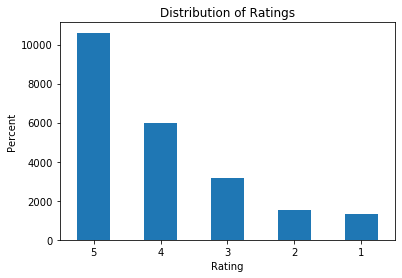

In [11]:
# Examine rating distribution
clean_df['Rating'].value_counts().plot(kind='bar', rot = 0);
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel("Percent")
plt.show()

## 4. Export Final Data

In [12]:
# Save as one file
#clean_df.to_csv("./data/clean_scrape.csv", index=False)

In [13]:
# Check load
total_df = pd.read_csv("./data/clean_scrape.csv")
print(total_df.shape)
total_df.head()

(22563, 5)


,Location,Hotel,Title,Review,Rating
0,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Great View,Easy check in and check out process using the ...,5
1,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Clean and Comfortable,We needed a last-minute place to stay in Denve...,5
2,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Excellent Staff & Service,We love Hyatt hotels and have had many great e...,5
3,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Trip to Denver - a Hallmark Christmas,"I have never encountered such helpful, friendl...",5
4,"Denver, CO",Hyatt Regency Denver At Colorado Convention Ce...,Our 'see downtown' hotel,"We love it here! Great service, they usually r...",5


Continue to data analysis at this link: [`NLP_and_modeling.ipynb`](./NLP_and_modeling.ipynb)